In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [3]:
trump_tweets = pd.read_csv('tweets/trump.csv')

print(trump_tweets.shape)
trump_tweets.head(10)

(3591, 7)


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Will be interviewed at the Border by @seanhann...,01-11-2019 01:45:54,11518,67631,False,1083540470570143750
1,Twitter for iPhone,Dear Diary... https://t.co/NAuMaQW6fl,01-11-2019 01:10:49,45849,177910,False,1083531644785455104
2,Twitter for iPhone,From the Southern Border.... https://t.co/Vgsf...,01-10-2019 22:41:01,33539,129711,False,1083493944527249408
3,Twitter for iPhone,RT @SenateGOP: Why do we need border security?...,01-10-2019 18:17:01,25555,0,True,1083427505736839168
4,Twitter for iPhone,Because of the Democrats intransigence on Bord...,01-10-2019 18:14:31,21503,95295,False,1083426878336036865
5,Twitter for iPhone,President Obama thank you for your great suppo...,01-10-2019 16:47:11,55042,173490,False,1083404900862545920
6,Twitter for iPhone,MAKE AMERICA GREAT AGAIN!,01-10-2019 13:43:54,42673,198515,False,1083358775925460992
7,Twitter for iPhone,Getting ready to leave for the Great State of ...,01-10-2019 13:43:15,15164,101829,False,1083358611315789826
8,Twitter for iPhone,“Great support for Border Security and the Wal...,01-10-2019 13:41:25,18519,90118,False,1083358150214979585
9,Twitter for iPhone,There is GREAT unity with the Republicans in t...,01-10-2019 13:34:10,18829,87119,False,1083356326833602561


In [4]:
bolso_tweets = pd.read_csv('tweets/bolsonaro.csv')

print(bolso_tweets.shape)
bolso_tweets.head(10)

(3274, 11)


,screen_name,created_at,text,retweet_count,favorite_count,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
0,jairbolsonaro,2019-11-01T00:30:19Z,"De volta ao Brasil, após viagem de negócios pe...",363,1975,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190063483779465219
1,jairbolsonaro,2019-10-31T21:31:36Z,"O @MInfraestrutura , junto com o @DNIToficial ...",314,1498,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190018506533814307
2,jairbolsonaro,2019-10-31T20:28:18Z,É uma enorme satisfação ver a alegria dessa mo...,93,563,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190002578521767936
3,jairbolsonaro,2019-10-31T19:00:44Z,"A Baia de Angra dos Reis pode ser a nossa ""Can...",313,1637,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189980543380836356
4,jairbolsonaro,2019-10-31T17:10:23Z,"Bahia: concessão da Ferrovia Oeste-Leste, trec...",140,738,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189952770088013824
5,jairbolsonaro,2019-10-31T11:52:19Z,RT @SF_Moro: Prosseguem os recordes de apreens...,6478,0,NaN,SF_Moro,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189872726091141121
6,jairbolsonaro,2019-10-30T22:57:59Z,@Pauloeuaqui Kkkkkk,1,29,Pauloeuaqui,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,NaN,1189677859176095744
7,jairbolsonaro,2019-10-30T22:53:23Z,Risco-Brasil chega a seu menor patamar desde 2...,1074,4714,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189676703204937729
8,jairbolsonaro,2019-10-30T20:12:46Z,E CONHECEREIS A VERDADE E A VERDADE VOS LIBERT...,1255,4409,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189636282227531776
9,jairbolsonaro,2019-10-30T18:13:02Z,"Seguimos ampliando as possibilidades, bem como...",126,727,jairbolsonaro,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189606148267229184


clean tweets

In [5]:
import string, re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

def clean(text, language):
    stop = set(stopwords.words(language))
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    doc = re.sub(r'http\S+', '', text)
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

bolso_tweets_cleaned = []
for tweet in bolso_tweets['text'].values:
    bolso_tweets_cleaned.append(clean(tweet,'portuguese'))
    
trump_tweets_cleaned = []
for tweet in trump_tweets['text'].values:
    trump_tweets_cleaned.append(clean(tweet,'english'))

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def print_clusters(cluster):
    i = 0
    label = ['purple', 'yellow', 'ciano', 'green']
    for c in cluster:
        print('Cluster no. '+str(i)+' - '+label[i] )
        print(', '.join(c))
        i = i + 1
        
def kmeans(documents):

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(documents)
    true_k = 4
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=20 )
    model.fit(X)
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    topics = []
    for i in range(true_k):
        t = []
        for ind in order_centroids[i, :10]:
            t.append(terms[ind])
        topics.append(t)
        
    pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ])          

    X = pipeline.fit_transform(documents).todense()        
    pca = PCA(n_components=50).fit(X)
    data2D = pca.transform(X)
    plt.figure(figsize=(20,14))
    plt.scatter(data2D[:,0], data2D[:,1],c=model.labels_, cmap='viridis')
    plt.show()
    print_clusters(topics)


Trump tweets - clustered


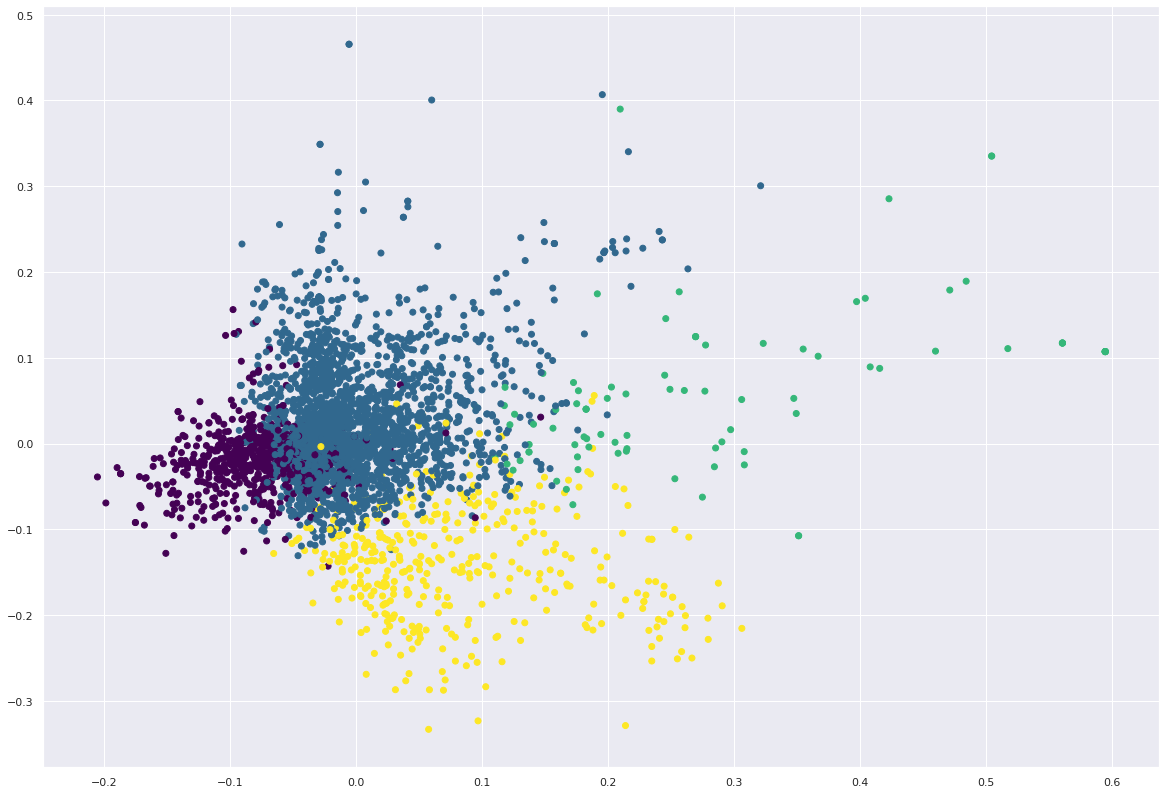

Cluster no. 0 - purple
fake, news, witch, hunt, fbi, collusion, amp, medium, trump, russia
Cluster no. 1 - yellow
rt, great, thank, president, country, realdonaldtrump, state, people, today, year
Cluster no. 2 - ciano
america, again, great, make, making, together, first, business, winning, open
Cluster no. 3 - green
border, vote, security, crime, wall, strong, democrat, military, want, great


In [7]:
print('Trump tweets - clustered')
kmeans(trump_tweets_cleaned)


Bolsonaro tweets - clustered


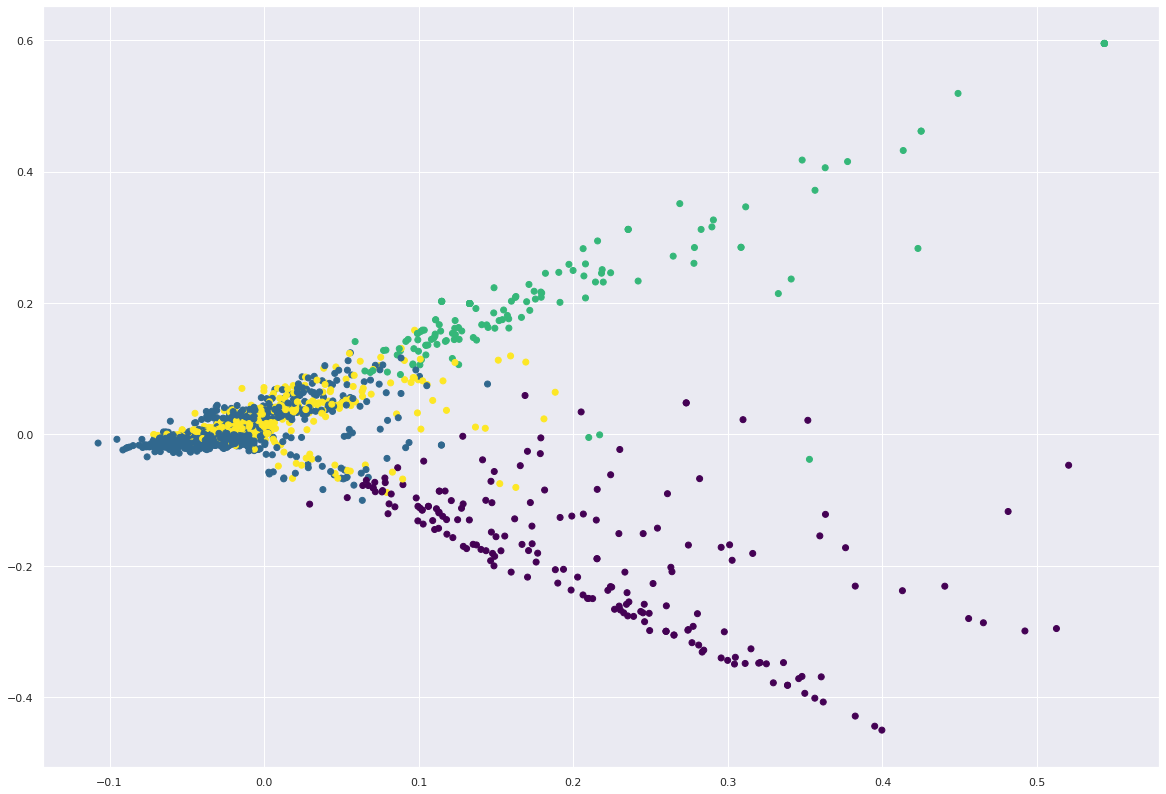

Cluster no. 0 - purple
abraço, forte, obrigado, consideração, todos, grato, homenagem, brasil, grande, confiança
Cluster no. 1 - yellow
rt, bolsonaro, governo, sobre, jair, presidente, hoje, dia, ministro, carlosbolsonaro
Cluster no. 2 - ciano
bom, todos, boa, dia, noite, grande, domingo, tarde, semana, brasil
Cluster no. 3 - green
brasil, vamos, país, economia, mundo, ano, junto, todos, governo, maior


In [8]:
print('\nBolsonaro tweets - clustered')
kmeans(bolso_tweets_cleaned)

hatesonar and sentiment analysis

In [14]:
from hatesonar import Sonar
from textblob import TextBlob
import mtranslate

def sentiment_analysis(docs, translate):
    sonar = Sonar()
    sonar_dict = []
    polarity = []
    for documents in docs:
        if(translate):
            documents = mtranslate.translate(documents)
        sonar_dict.append(sonar.ping(text=documents))
        analysis_tb = TextBlob(documents)
        polarity.append(analysis_tb.sentiment.polarity)
        
    return sonar_dict, polarity

#use bolso translate = 1 for accuracy, but it takes some time
bolso_sonar, bolso_polarity = sentiment_analysis(bolso_tweets_cleaned,0)
trump_sonar, trump_polarity = sentiment_analysis(trump_tweets_cleaned,0)

Text(0.5, 0, 'polarity')

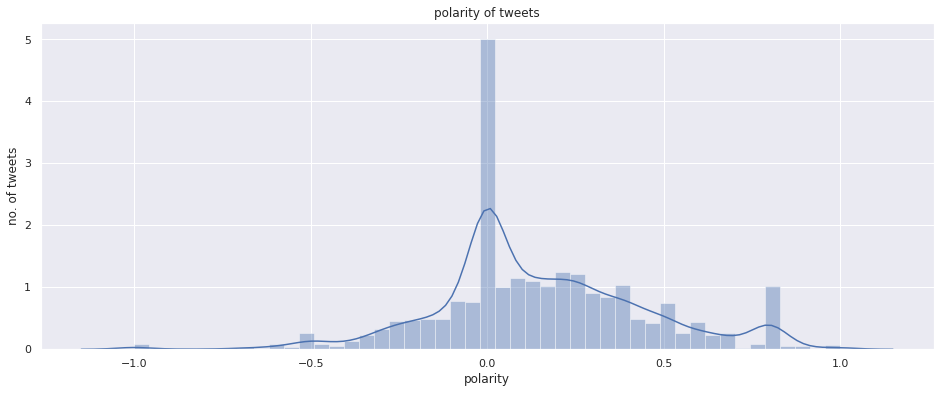

In [16]:
plt.figure(figsize=(16,6))
fig = sns.distplot(trump_polarity)
fig.set_title('polarity of tweets - trump')
fig.set_ylabel('no. of tweets')
fig.set_xlabel('polarity')

Trump tweets


Text(0.5, 0, 'prob. of neutral speech')

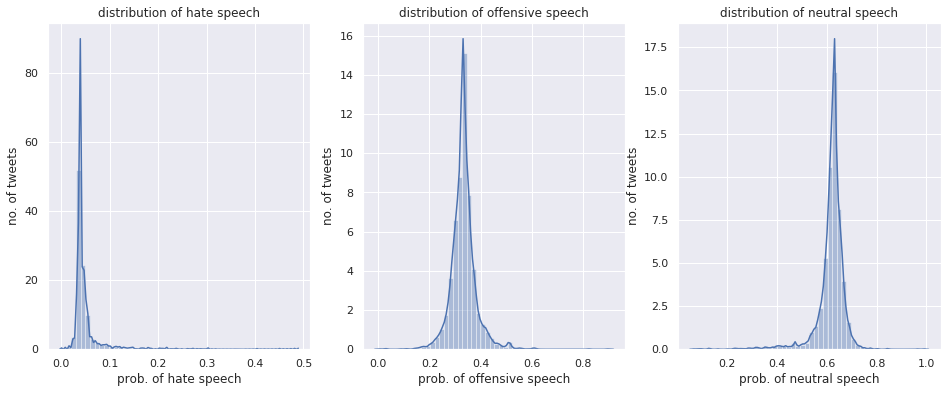

In [17]:
trump_hate = []
trump_offe = []
trump_neit = []

for i in trump_sonar:
    trump_hate.append(i['classes'][0]['confidence'])
    trump_offe.append(i['classes'][1]['confidence'])
    trump_neit.append(i['classes'][2]['confidence'])
print('Trump tweets')
fig, (ax1, ax2, ax3)  = plt.subplots(1,3, figsize=(16,6))
sns.distplot(trump_hate, ax=ax1)
ax1.set_title('distribution of hate speech')
ax1.set_ylabel('no. of tweets')
ax1.set_xlabel('prob. of hate speech')
sns.distplot(trump_offe, ax=ax2)
ax2.set_title('distribution of offensive speech')
ax2.set_ylabel('no. of tweets')
ax2.set_xlabel('prob. of offensive speech')
sns.distplot(trump_neit, ax=ax3)
ax3.set_ylabel('no. of tweets')
ax3.set_title('distribution of neutral speech')
ax3.set_xlabel('prob. of neutral speech')

Text(0.5, 0, 'polarity')

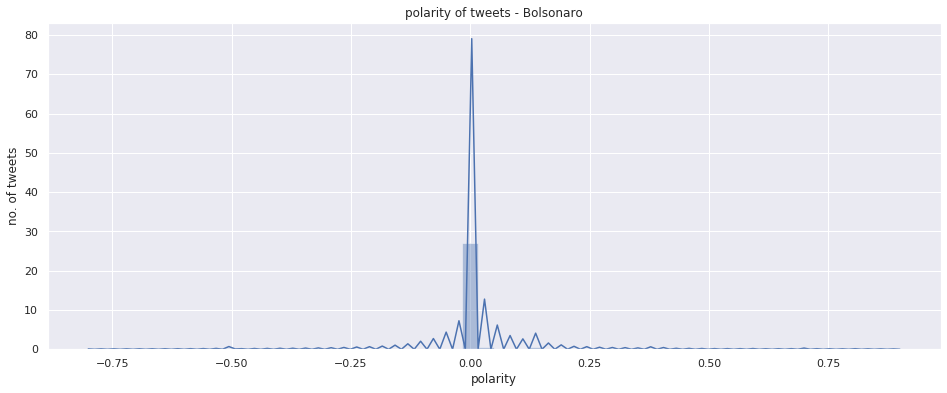

In [20]:
plt.figure(figsize=(16,6))

fig = sns.distplot(bolso_polarity)
fig.set_title('polarity of tweets - Bolsonaro')
fig.set_ylabel('no. of tweets')
fig.set_xlabel('polarity')

Bolsonaro tweets


Text(0.5, 0, 'prob. of neutral speech')

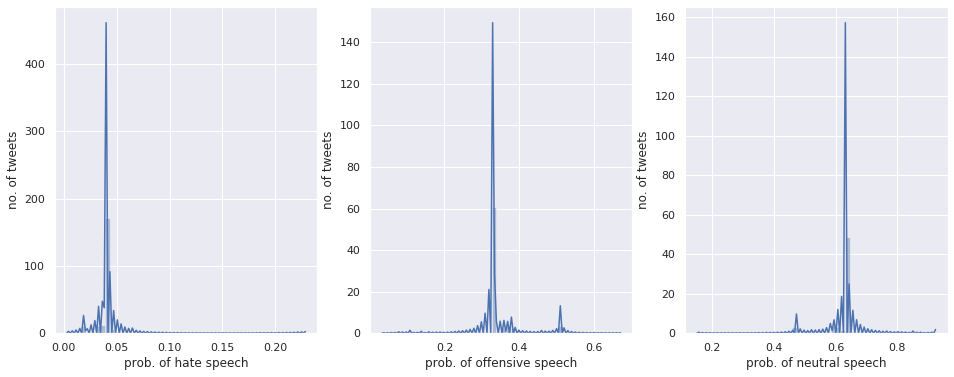

In [21]:
bolso_hate = []
bolso_offe = []
bolso_neit = []

for i in bolso_sonar:
    bolso_hate.append(i['classes'][0]['confidence'])
    bolso_offe.append(i['classes'][1]['confidence'])
    bolso_neit.append(i['classes'][2]['confidence'])
print('Bolsonaro tweets')
fig, (ax1, ax2, ax3)  = plt.subplots(1,3, figsize=(16,6))
sns.distplot(bolso_hate, ax=ax1)
ax1.set_ylabel('no. of tweets')
ax1.set_xlabel('prob. of hate speech')
sns.distplot(bolso_offe, ax=ax2)
ax2.set_ylabel('no. of tweets')
ax2.set_xlabel('prob. of offensive speech')
sns.distplot(bolso_neit, ax=ax3)
ax3.set_ylabel('no. of tweets')
ax3.set_xlabel('prob. of neutral speech')